<a href="https://colab.research.google.com/github/Larr014/DataMining/blob/master/Fake_News_BN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bayesian Network Covid 19 Fake News


> Autor: Luis Rojas Rubio


> Dataset: https://raw.githubusercontent.com/susanli2016/NLP-with-Python/master/data/corona_fake.csv


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive


In [ ]:
df =pd.read_csv('/gdrive/My Drive/Colab Notebooks/dataset/BN/corona_fake.csv')
df

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
1,NaN,Hydroxychloroquine has been shown to have a 10...,RudyGiuliani,Fake
2,NaN,Fact: Hydroxychloroquine has been shown to hav...,CharlieKirk,Fake
3,NaN,The Corona virus is a man made virus created i...,JoanneWrightForCongress,Fake
4,NaN,Doesn’t @BillGates finance research at the Wuh...,JoanneWrightForCongress,Fake
...,...,...,...,...
1159,Could the Power of the Sun Slow the Coronavirus?,A study suggests that ultraviolet rays could s...,https://www.nytimes.com/,TRUE
1160,Key evidence for coronavirus spread is flawed ...,"Last week, a medical journal reported that a b...",https://www.nytimes.com/,TRUE
1161,Summer Heat May Not Diminish Coronavirus Strength,"A new report, sent to the White House science ...",https://www.nytimes.com/,TRUE
1162,How Long Will a Vaccine Really Take?,A vaccine would be the ultimate weapon against...,https://www.nytimes.com/,TRUE


## Pre procesamiento

### Eliminar celdas vacías

In [ ]:
df = df.dropna()
df

,title,text,source,label
0,Due to the recent outbreak for the Coronavirus...,"You just need to add water, and the drugs and ...",coronavirusmedicalkit.com,Fake
9,Basic protective measures against the new coro...,Stay aware of the latest information on the CO...,https://www.who.int/emergencies/diseases/novel...,TRUE
14,Exposing yourself to the sun or to temperature...,"You can catch COVID-19, no matter how sunny or...",https://www.who.int/emergencies/diseases/novel...,TRUE
16,Being able to hold your breath for 10 seconds ...,The most common symptoms of COVID-19 are dry c...,https://www.who.int/emergencies/diseases/novel...,TRUE
17,Drinking alcohol does not protect you against ...,Frequent or excessive alcohol consumption can ...,https://www.who.int/emergencies/diseases/novel...,TRUE
...,...,...,...,...
1159,Could the Power of the Sun Slow the Coronavirus?,A study suggests that ultraviolet rays could s...,https://www.nytimes.com/,TRUE
1160,Key evidence for coronavirus spread is flawed ...,"Last week, a medical journal reported that a b...",https://www.nytimes.com/,TRUE
1161,Summer Heat May Not Diminish Coronavirus Strength,"A new report, sent to the White House science ...",https://www.nytimes.com/,TRUE
1162,How Long Will a Vaccine Really Take?,A vaccine would be the ultimate weapon against...,https://www.nytimes.com/,TRUE


### Eliminar features innecesarias

In [ ]:
X=df.drop('title',axis=1)
X=X.drop('source',axis=1)


Convertimos el contenido de la columna label a minusculas para evitar inconsistencias de clase

In [ ]:
X['label'] = X['label'].str.lower()

In [ ]:
X.head()

,text,label
0,"You just need to add water, and the drugs and ...",fake
9,Stay aware of the latest information on the CO...,true
14,"You can catch COVID-19, no matter how sunny or...",true
16,The most common symptoms of COVID-19 are dry c...,true
17,Frequent or excessive alcohol consumption can ...,true


### Stemming, eliminar stopwords y puntuaciones

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
ps = PorterStemmer()
def stemming(m):
  corpus = []
  for i in range(0,len(m)):
    if (i%10==0):
      print(f'Avance: {(i+1)*100/len(m)} %')
    review = re.sub('[^a-zA-Z]', ' ', m['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)
    
  return corpus

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
messages = X.copy()
messages

,text,label
0,"You just need to add water, and the drugs and ...",fake
9,Stay aware of the latest information on the CO...,true
14,"You can catch COVID-19, no matter how sunny or...",true
16,The most common symptoms of COVID-19 are dry c...,true
17,Frequent or excessive alcohol consumption can ...,true
...,...,...
1159,A study suggests that ultraviolet rays could s...,true
1160,"Last week, a medical journal reported that a b...",true
1161,"A new report, sent to the White House science ...",true
1162,A vaccine would be the ultimate weapon against...,true


Los indices deben ser reiniciados ya que no son correlativos

In [ ]:
messages.reset_index(inplace=True)
messages

,index,text,label
0,0,"You just need to add water, and the drugs and ...",fake
1,9,Stay aware of the latest information on the CO...,true
2,14,"You can catch COVID-19, no matter how sunny or...",true
3,16,The most common symptoms of COVID-19 are dry c...,true
4,17,Frequent or excessive alcohol consumption can ...,true
...,...,...,...
1054,1159,A study suggests that ultraviolet rays could s...,true
1055,1160,"Last week, a medical journal reported that a b...",true
1056,1161,"A new report, sent to the White House science ...",true
1057,1162,A vaccine would be the ultimate weapon against...,true


Eliminando el indice por defecto

In [ ]:
messages=messages.drop('index',axis=1)
messages

,text,label
0,"You just need to add water, and the drugs and ...",fake
1,Stay aware of the latest information on the CO...,true
2,"You can catch COVID-19, no matter how sunny or...",true
3,The most common symptoms of COVID-19 are dry c...,true
4,Frequent or excessive alcohol consumption can ...,true
...,...,...
1054,A study suggests that ultraviolet rays could s...,true
1055,"Last week, a medical journal reported that a b...",true
1056,"A new report, sent to the White House science ...",true
1057,A vaccine would be the ultimate weapon against...,true


In [ ]:
corpus = stemming(messages)

Avance: 0.09442870632672333 %
Avance: 1.0387157695939566 %
Avance: 1.9830028328611897 %
Avance: 2.927289896128423 %
Avance: 3.8715769593956564 %
Avance: 4.81586402266289 %
Avance: 5.760151085930123 %
Avance: 6.704438149197356 %
Avance: 7.648725212464589 %
Avance: 8.593012275731823 %
Avance: 9.537299338999055 %
Avance: 10.48158640226629 %
Avance: 11.425873465533522 %
Avance: 12.370160528800755 %
Avance: 13.314447592067989 %
Avance: 14.258734655335221 %
Avance: 15.203021718602455 %
Avance: 16.14730878186969 %
Avance: 17.091595845136922 %
Avance: 18.035882908404155 %
Avance: 18.980169971671387 %
Avance: 19.924457034938623 %
Avance: 20.868744098205855 %
Avance: 21.813031161473088 %
Avance: 22.75731822474032 %
Avance: 23.701605288007553 %
Avance: 24.64589235127479 %
Avance: 25.59017941454202 %
Avance: 26.534466477809254 %
Avance: 27.478753541076486 %
Avance: 28.423040604343722 %
Avance: 29.367327667610954 %
Avance: 30.311614730878187 %
Avance: 31.25590179414542 %
Avance: 32.200188857412655 

## Tf Idf

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

sw = stopwords.words('english')
# print(sw)
vectorizer = CountVectorizer(stop_words=sw, token_pattern=r'[^\d\W]+')

transformer = TfidfTransformer()

freq_matrix = vectorizer.fit_transform(corpus)
# print(freq_matrix)
feature_names = vectorizer.get_feature_names()

tfidf_matrix = transformer.fit_transform(freq_matrix)

dense_frec = freq_matrix.todense()
denselist_frec = dense_frec.tolist()
df = pd.DataFrame(denselist_frec, columns=feature_names)
df.head()

,aaa,aadhithya,aap,aarhu,aaron,ab,abandon,abat,abbrevi,abbvi,abc,abdomin,abet,abid,abil,abjectli,abjur,abl,abnorm,aboard,abolish,abolit,abomin,abort,abound,abreast,abroad,abruptli,abscess,absenc,absent,absente,absolut,absolutist,absorb,absorpt,abstract,absurd,abund,abundantli,...,zhengsheng,zhi,zhihong,zhime,zhimin,zhiyong,zhongnan,zhou,zhoushan,zhu,zhuravlev,zica,ziegler,zika,zimbabw,zinc,zingib,zionist,zip,zithromax,zombi,zombieland,zombielik,zone,zoo,zoolog,zoom,zoonos,zoonot,zorlesco,zoster,zs,zte,zucker,zuckerberg,zurich,zvezda,zxc,zy,zygmunt
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Total de features

In [ ]:
n_features = df.shape[1]
n_features

13361

Tf Idf para la palabra covid

In [ ]:
df['covid']

0        0
1        6
2        2
3        2
4        0
        ..
1054     4
1055     0
1056     1
1057    14
1058     4
Name: covid, Length: 1059, dtype: int64

## Conjunto de Entrenamiento y conjunto de Prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, X['label'], 
                                                    test_size=0.2, random_state=42
                                                    )

In [ ]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
X_train

,aaa,aadhithya,aap,aarhu,aaron,ab,abandon,abat,abbrevi,abbvi,abc,abdomin,abet,abid,abil,abjectli,abjur,abl,abnorm,aboard,abolish,abolit,abomin,abort,abound,abreast,abroad,abruptli,abscess,absenc,absent,absente,absolut,absolutist,absorb,absorpt,abstract,absurd,abund,abundantli,...,zhengsheng,zhi,zhihong,zhime,zhimin,zhiyong,zhongnan,zhou,zhoushan,zhu,zhuravlev,zica,ziegler,zika,zimbabw,zinc,zingib,zionist,zip,zithromax,zombi,zombieland,zombielik,zone,zoo,zoolog,zoom,zoonos,zoonot,zorlesco,zoster,zs,zte,zucker,zuckerberg,zurich,zvezda,zxc,zy,zygmunt
331,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
323,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1009,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1044,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Creación del modelo

In [ ]:
%time model = MultinomialNB().fit(X_train, y_train)

CPU times: user 50.9 ms, sys: 985 µs, total: 51.9 ms
Wall time: 52 ms


In [ ]:
y_pred = model.predict(X_test)

## Resultados

In [ ]:
print('accuracy of model1 {}'.format(accuracy_score(y_test, y_pred)))

accuracy of model1 0.9245283018867925


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

        fake       0.93      0.92      0.92       107
        true       0.92      0.93      0.92       105

    accuracy                           0.92       212
   macro avg       0.92      0.92      0.92       212
weighted avg       0.92      0.92      0.92       212



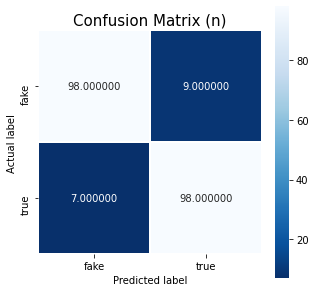

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
labels = ['fake','true']
cm = confusion_matrix(y_test,y_pred,labels)
plt.show()
figure = plt.figure(figsize=(5,5))
ax = figure.add_subplot(111)
sns.heatmap(cm, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');

plt.title('Confusion Matrix (n)', size = 15);
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()


In [ ]:
cm1 = confusion_matrix(y_test,y_pred,labels)+0.0

In [ ]:
for i in range(cm1.shape[0]):
  cm1[i]=cm1[0]/sum(cm1[i])
cm1

array([[9.15887850e-01, 8.41121495e-02],
       [8.72274143e-03, 8.01068091e-04]])

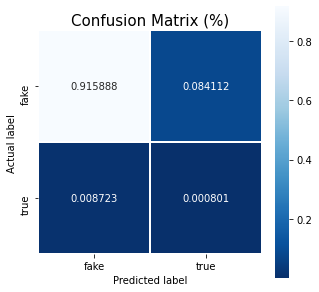

In [ ]:
labels = ['fake','true']
plt.show()
figure = plt.figure(figsize=(5,5))
ax = figure.add_subplot(111)
sns.heatmap(cm1, annot=True, linewidth=.5, square = True, cmap = 'Blues_r',fmt='f');

plt.title('Confusion Matrix (%)', size = 15);
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()
